# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

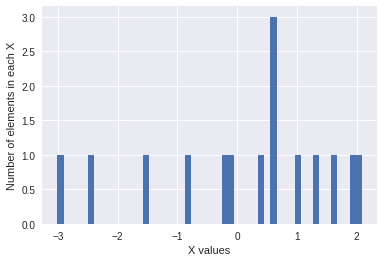

In [0]:
number_of_sums = 15 - найти количество
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

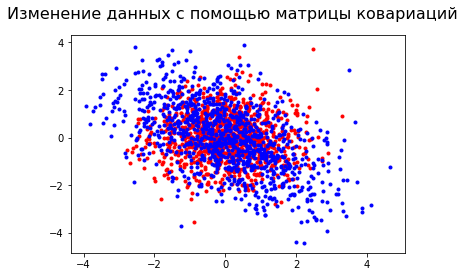

In [11]:
import numpy.linalg as la
n = 1000
C = [[2,-1],[-1,2]] #найти
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

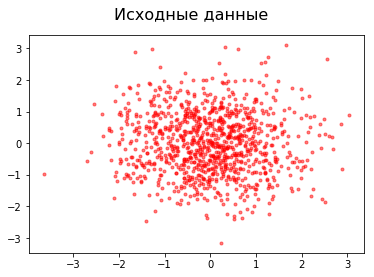

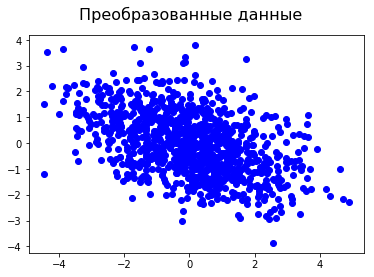

In [17]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2, -1],[-1, 2]] #найти
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [20]:
import math

theta = 135 * 3.14/180 #найти
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp) #найти
var_theoretical = u.T * c * u #найти
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  2.9369884586030293
теоритический подсчет:  [[2.99999715]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

Ответ: Да, теоритически и практически расчитанный разброс примерно равны.

Посчитать как меняется вариация в зависимости от выбора собственного вектора

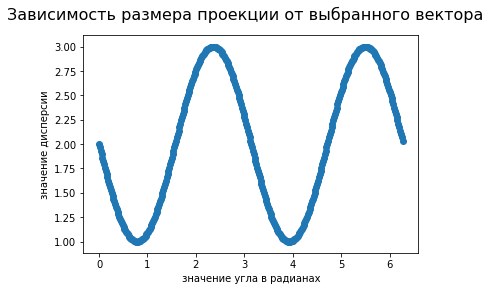

In [21]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Работа с данными данные

Загрузить таблицу. 

In [22]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [29]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770']])
print(np_scaled)
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

[[-0.99990883 -0.99467969 -0.99996217]
 [-0.99994071 -0.99563873 -0.99995419]
 [-0.99993012 -0.98933594 -0.9998975 ]
 ...
 [-0.99989519 -0.99976036 -0.99942827]
 [-0.99986567 -0.99970875 -0.999429  ]
 [-0.99974544 -0.9997698  -0.99982365]]
          0         1         2
0 -0.999909 -0.994680 -0.999962
1 -0.999941 -0.995639 -0.999954
2 -0.999930 -0.989336 -0.999898
3 -0.999900 -0.992968 -0.999943
4 -0.999917 -0.995717 -0.999940


In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

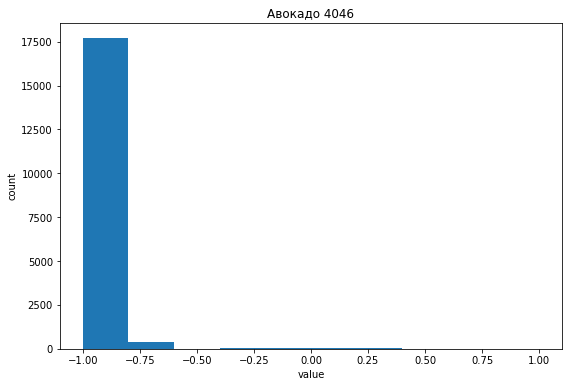

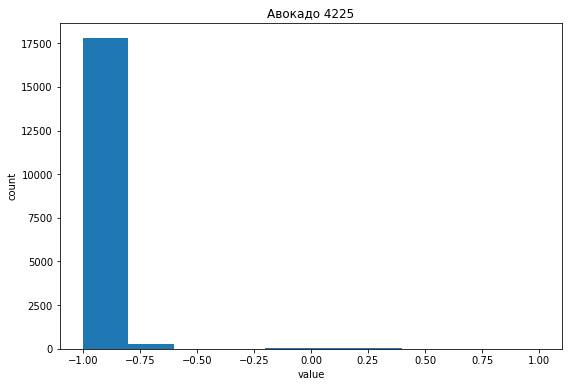

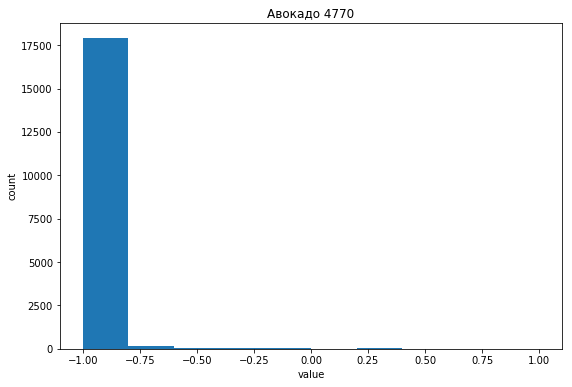

In [118]:
plt.hist(df_norm[0])
plt.xlabel('value')
plt.ylabel('count')
plt.title('Авокадо 4046')
plt.show()

plt.hist(df_norm[1])
plt.xlabel('value')
plt.ylabel('count')
plt.title('Авокадо 4225')
plt.show()

plt.hist(df_norm[2])
plt.xlabel('value')
plt.ylabel('count')
plt.title('Авокадо 4770')
plt.show()

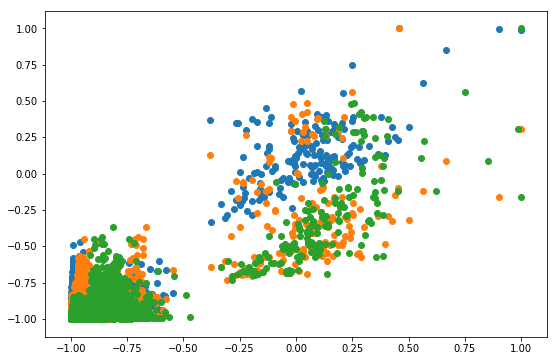

In [69]:
plt.scatter(df_norm[0],df_norm[1])
plt.scatter(df_norm[0],df_norm[2])
plt.scatter(df_norm[1],df_norm[2])

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [72]:
a = df_norm.corr()

In [73]:
w,v = np.linalg.eig(a)

In [74]:
print(w)
print(v)

[2.76544627 0.17115766 0.06339607]
[[-0.57634639 -0.6019748   0.55267638]
 [-0.58783414 -0.16442044 -0.79209654]
 [-0.56769345  0.78140403  0.25909821]]


# Поиск собственного вектора

1.8333891041719104 [0.70710678 0.70710678]


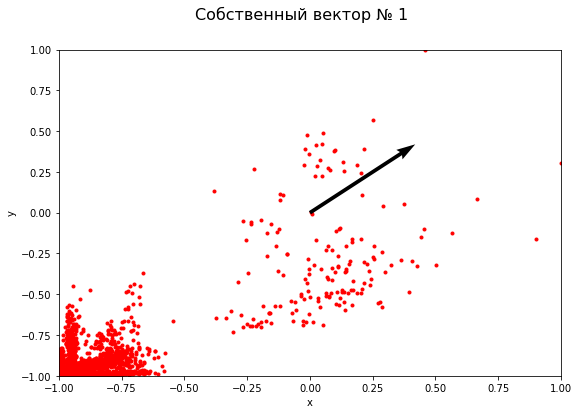

0.16661089582808963 [-0.70710678  0.70710678]


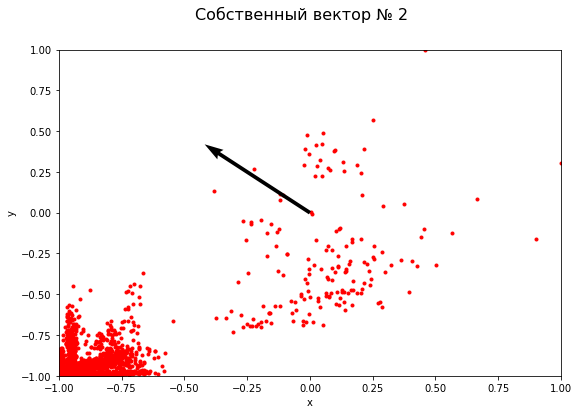

In [98]:
import numpy.linalg as la
n=1000
Cb = df_norm[[0,2]].corr()

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(df_norm[0], df_norm[2], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1],  angles = 'xy', scale=4, zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

[[2.  1. ]
 [3.  2. ]
 [3.  3. ]
 [2.5 3. ]
 [2.8 2.3]
 [3.2 2.5]]


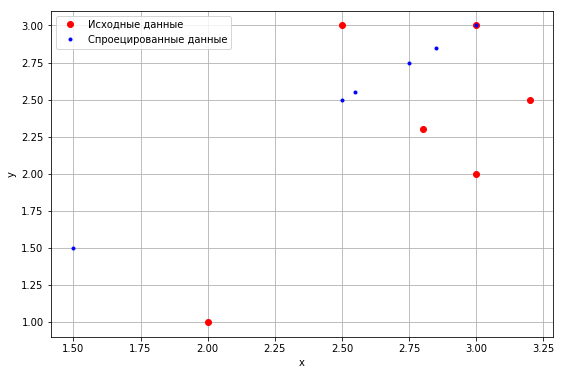

In [103]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
print(Xc)
P = np.array([[0.5,0.5],[0.5,0.5]]) # проецирование на какую прямую
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

(array([14.,  0., 12.,  0., 20.,  0., 17.,  0., 22.,  0., 15.]),
 array([1.        , 1.45454545, 1.90909091, 2.36363636, 2.81818182,
        3.27272727, 3.72727273, 4.18181818, 4.63636364, 5.09090909,
        5.54545455, 6.        ]),
 <a list of 11 Patch objects>)

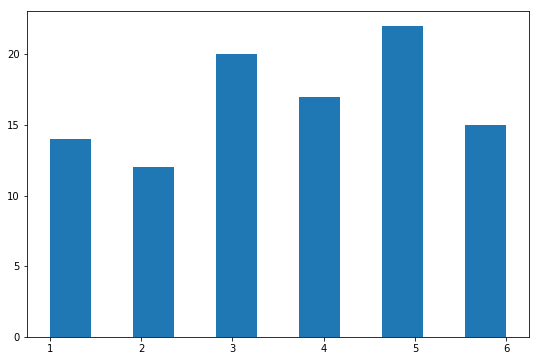

In [108]:
#1
import random
values = []
for i in range(100):
    values.append(random.randint(1,6))
plt.hist(values, bins=11)